In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./train.csv')
df.head(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True


In [8]:
df.tail(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [11]:
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
df.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [12]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [13]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [14]:
def cabin_decom(cabstr):
    if(type(cabstr) == float): 
        return np.nan, np.nan, np.nan
    parts = cabstr.split('/')
    return parts[0], parts[1], parts[2]

Funcion para decomponer el string de 'Cabin' en 3 datos mas

In [15]:
deck = [None for _ in range(len(df))]
num = [None for _ in range(len(df))]
side = [None for _ in range(len(df))] 
for index, i in df.iterrows():
    deck[index], num[index], side[index] = cabin_decom(df['Cabin'][index])

df['Deck'] = deck
df['Num'] = num
df['Side'] = side
df.drop(columns=['Cabin'], inplace=True)

In [16]:
df.head(8)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,G,0,S


In [17]:
earth_rows = df['HomePlanet'] == 'Earth'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck            104
Num             104
Side            104
dtype: int64

In [18]:
earth_rows = df['HomePlanet'] == 'Europa'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck             43
Num              43
Side             43
dtype: int64

In [19]:
earth_rows = df['HomePlanet'] == 'Mars'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              6
Num               6
Side              6
dtype: int64

In [20]:
df['Deck'].fillna(df['Deck'].mode()[0], inplace=True)
df['Num'].fillna(df['Num'].mode()[0], inplace=True)
df['Side'].fillna(df['Side'].mode()[0], inplace=True)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [21]:
earthlings =['G', 'E']
martians = ['F', 'D']
europans = ['B', 'C', 'A', 'T']

In [22]:
for i, row in df.iterrows():
    if(type(df['HomePlanet'][i]) == float):
        if(df['Deck'][i] in earthlings):
            df.loc[i, 'HomePlanet'] = 'Earth'
        elif(df['Deck'][i] in martians):
            df.loc[i, 'HomePlanet'] = 'Mars'
        elif(df['Deck'][i] in europans):
            df.loc[i, 'HomePlanet'] = 'Europa'

df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [23]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [24]:
df[df['Name'].isnull()]


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
27,0022_01,Mars,False,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False,D,0,P
58,0064_01,Mars,True,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,F,14,S
65,0069_01,Earth,False,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True,F,16,S
77,0082_03,Mars,False,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,F,16,P
101,0108_02,Earth,False,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,G,19,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,B,300,P
8631,9208_01,Earth,True,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,G,1485,S
8636,9218_01,Europa,True,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,B,353,S
8652,9230_01,Europa,False,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True,C,342,S


Text(0.5, 0, 'Edad')

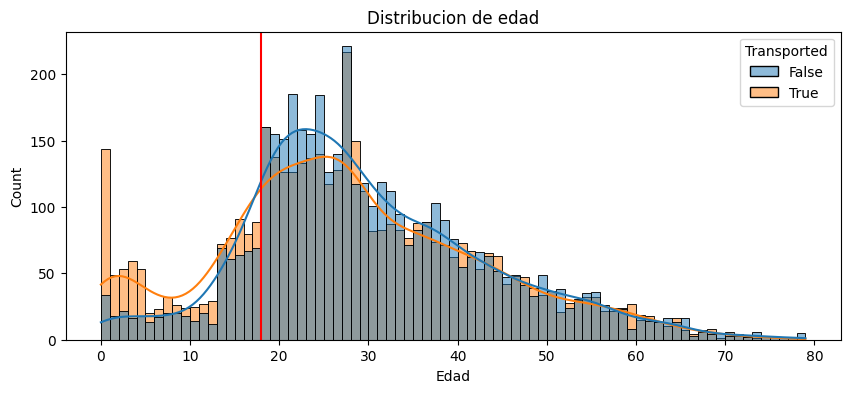

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)
plt.axvline(18, color='r')
plt.title('Distribucion de edad')
plt.xlabel('Edad')

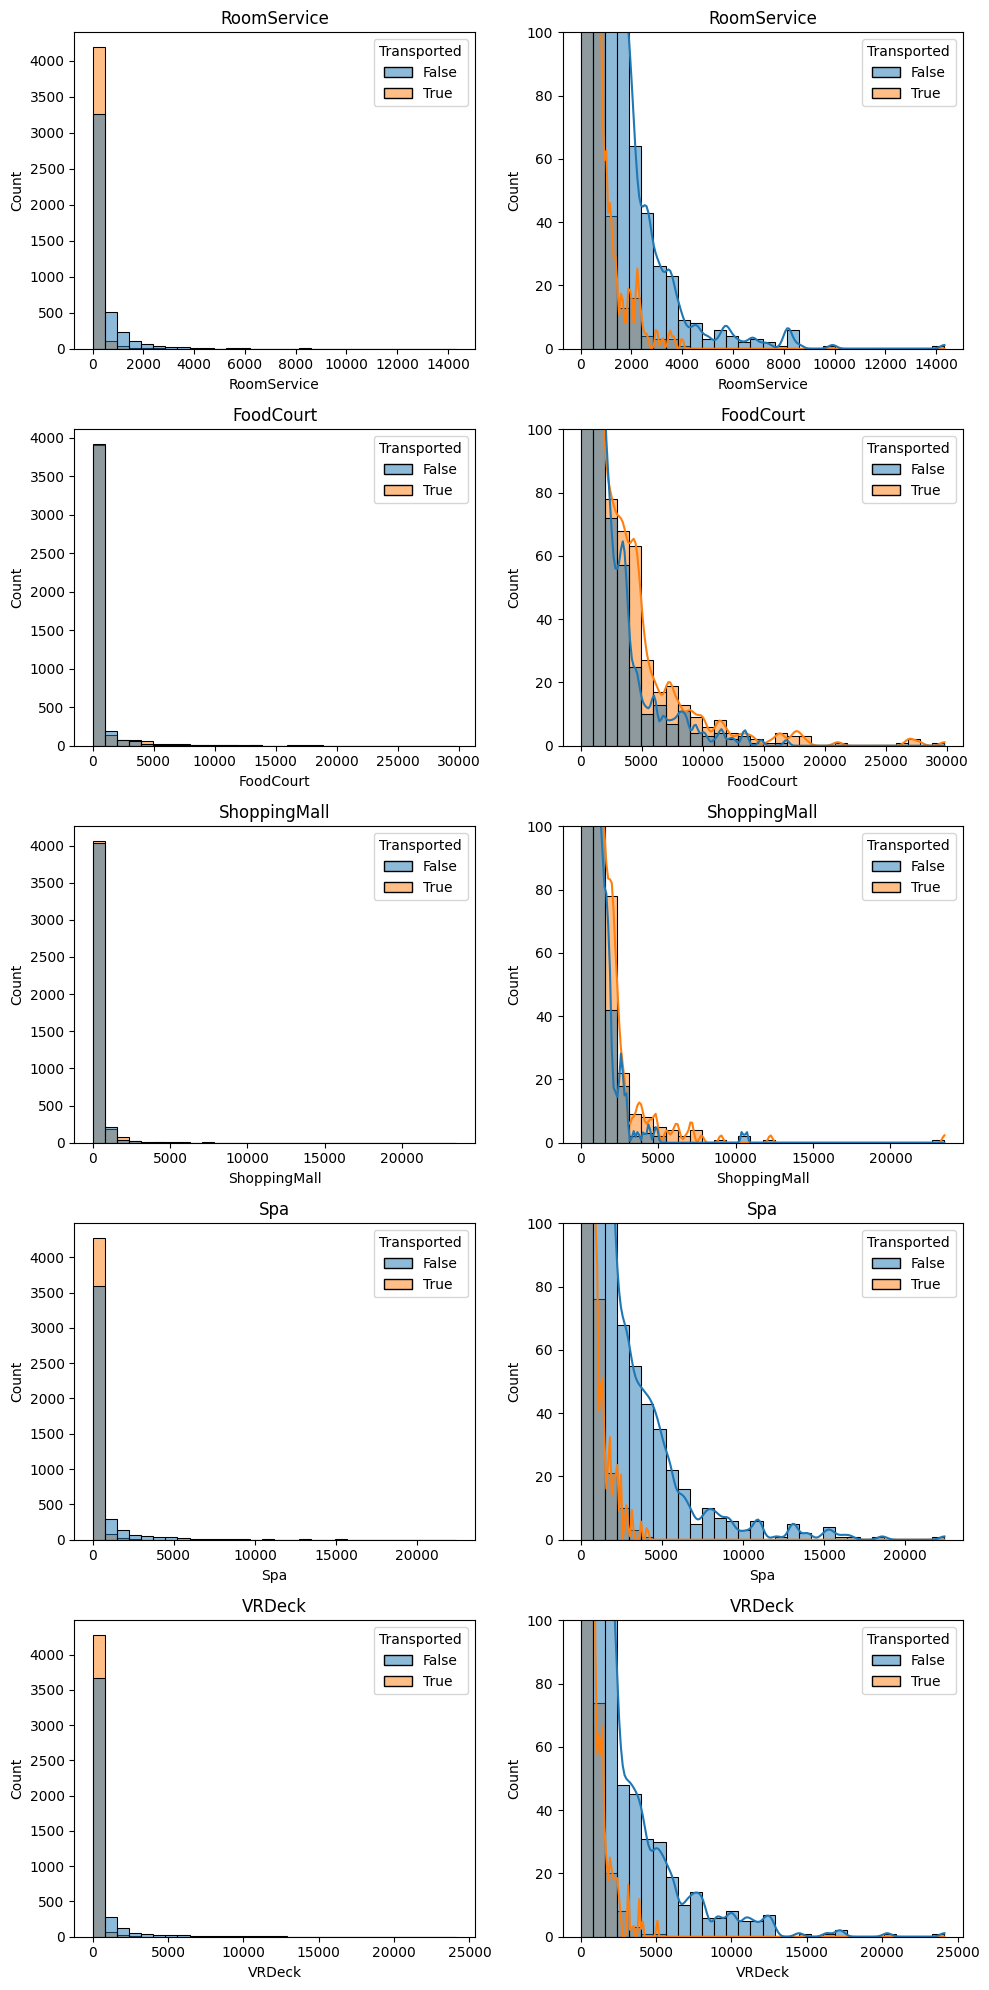

In [26]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

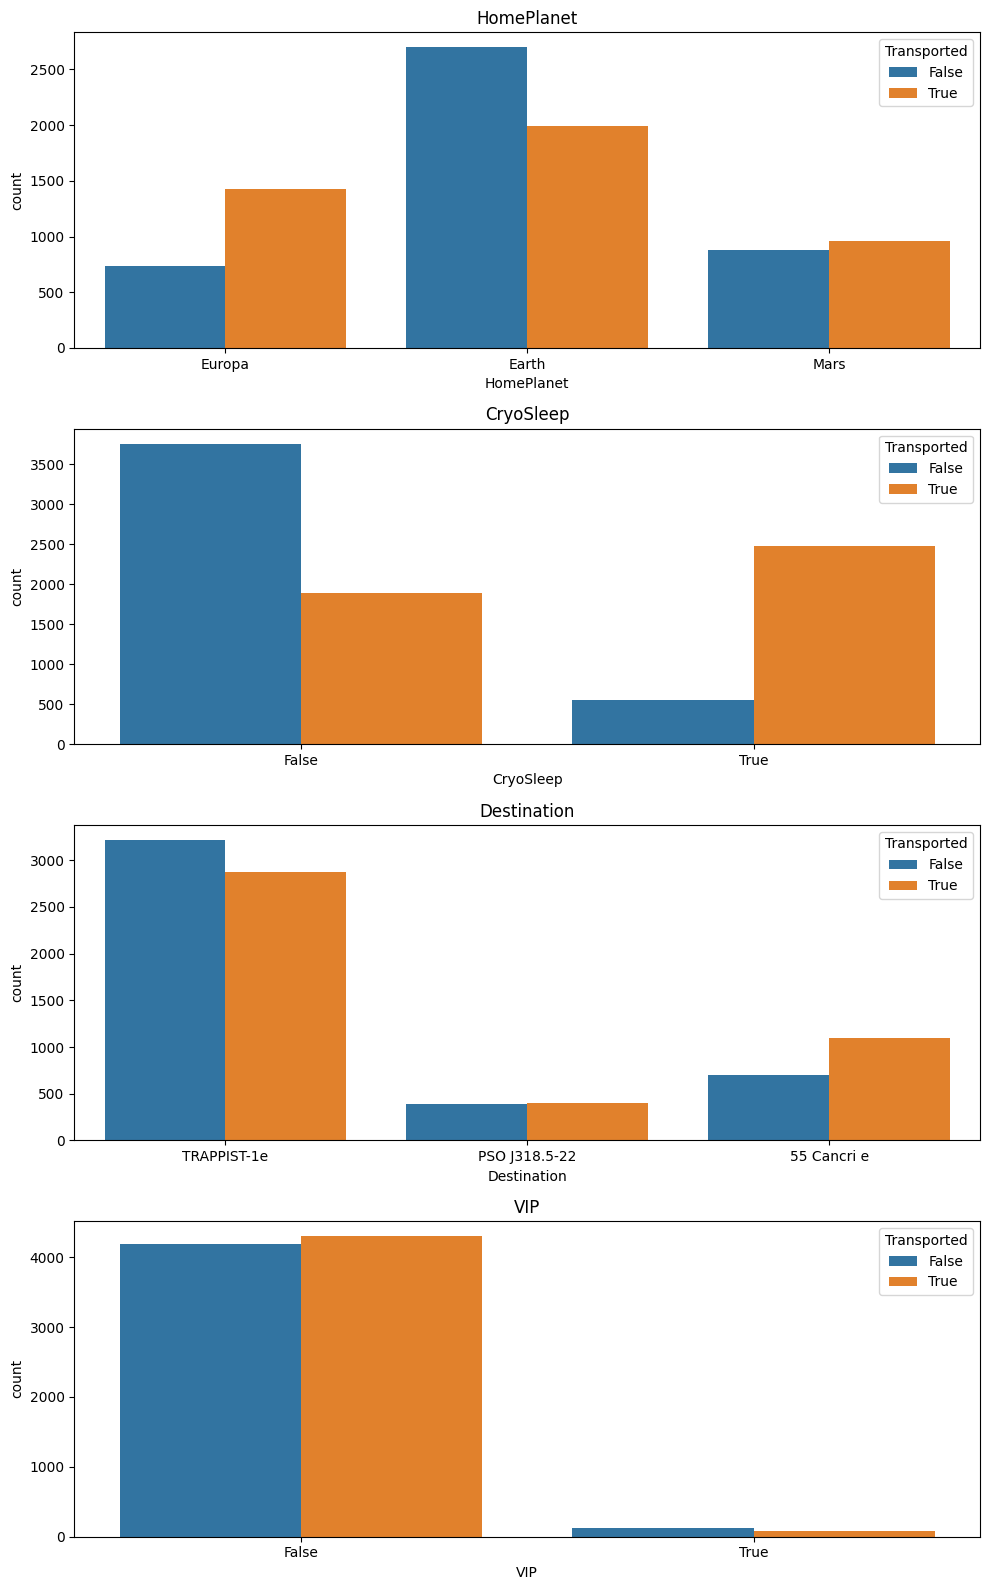

In [27]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout() 
plt.show()

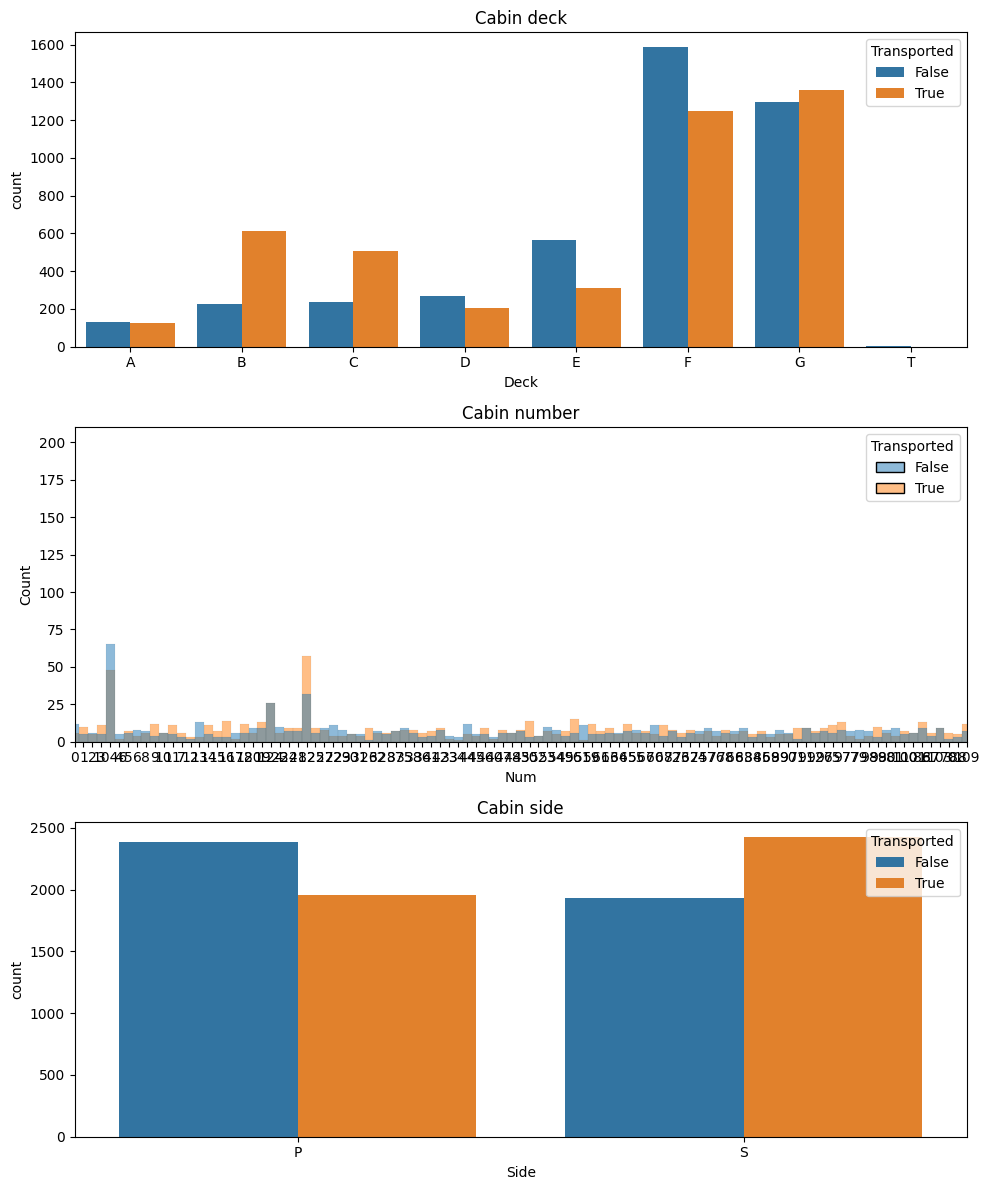

In [28]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=df, x='Deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=df, x='Num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,100])

plt.subplot(3,1,3)
sns.countplot(data=df, x='Side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

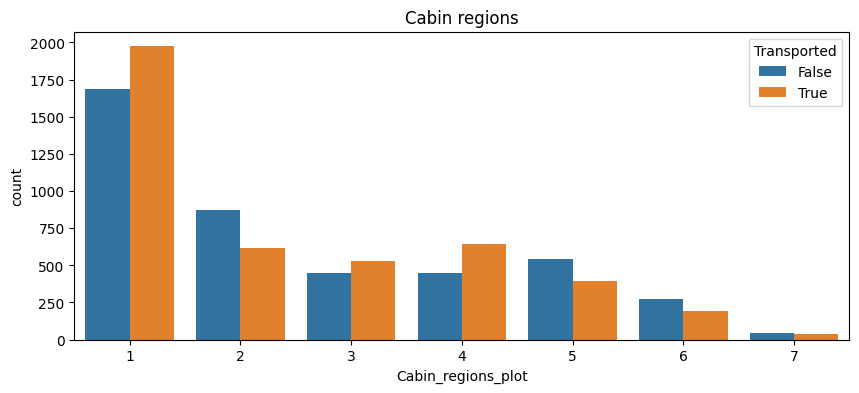

In [29]:
df['Cabin_region1']=(df['Num'].astype(int) <300)
df['Cabin_region2']=((df['Num'].astype(int)>=300) & (df['Num'].astype(int)<600))
df['Cabin_region3']=((df['Num'].astype(int)>=600) & (df['Num'].astype(int)<900))
df['Cabin_region4']=((df['Num'].astype(int)>=900) & (df['Num'].astype(int)<1200))
df['Cabin_region5']=((df['Num'].astype(int)>=1200) & (df['Num'].astype(int)<1500))
df['Cabin_region6']=((df['Num'].astype(int)>=1500) & (df['Num'].astype(int)<1800))
df['Cabin_region7']=(df['Num'].astype(int)>=1800)

plt.figure(figsize=(10,4))
df['Cabin_regions_plot']=(df['Cabin_region1']+2*df['Cabin_region2']+3*df['Cabin_region3']+4*df['Cabin_region4']+5*df['Cabin_region5']+6*df['Cabin_region6']+7*df['Cabin_region7']).astype(int)
sns.countplot(data=df, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df.drop('Cabin_regions_plot', axis=1, inplace=True)

In [30]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Deck,Num,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,B,0,P,True,False,False,False,False,False,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,F,0,S,True,False,False,False,False,False,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,A,0,S,True,False,False,False,False,False,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,A,0,S,True,False,False,False,False,False,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,F,1,S,True,False,False,False,False,False,False


In [31]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Deck               0
Num                0
Side               0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
dtype: int64

In [32]:
df.drop(columns=['Name'], inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

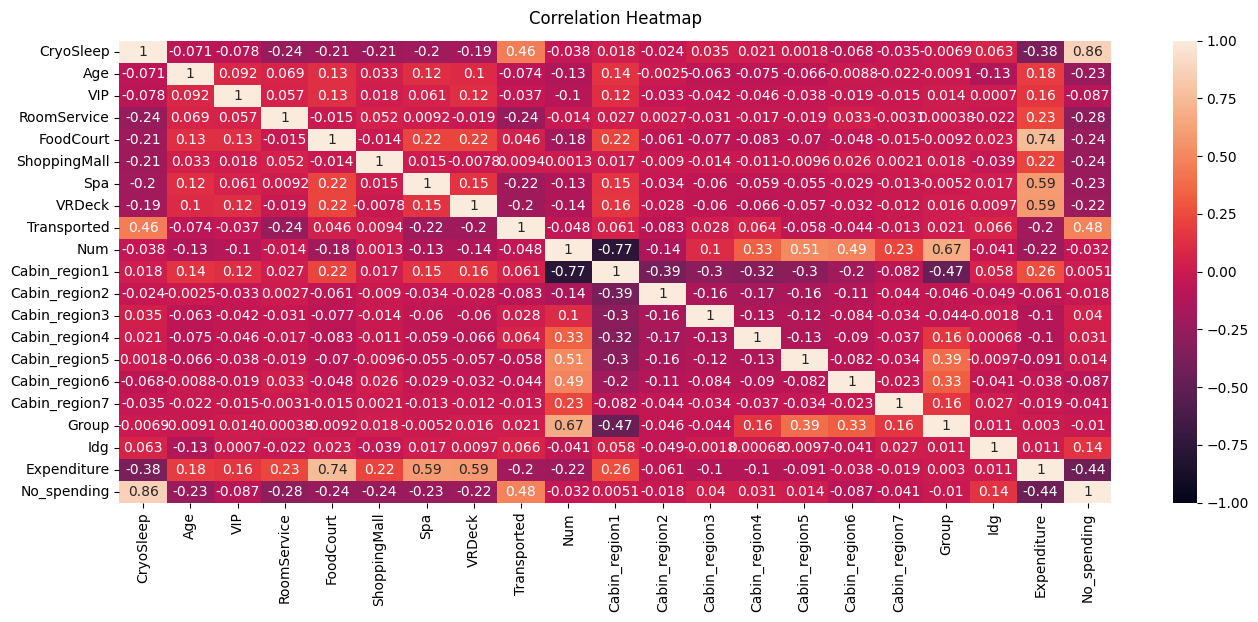

In [41]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.drop(columns=['HomePlanet', 'Destination', 'Deck', 'Side']).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [33]:
def id_decom(cabstr):
    if(type(cabstr) == float): 
        return np.nan, np.nan, np.nan
    parts = cabstr.split('_')
    return parts[0], parts[1]

In [34]:
group = [None for _ in range(len(df))]
idg = [None for _ in range(len(df))]
for index, i in df.iterrows():
    group[index], idg[index] = id_decom(df['PassengerId'][index])

df['Group'] = group
df['Idg'] = idg
df.drop(columns=['PassengerId'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Group,Idg
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,P,True,False,False,False,False,False,False,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,S,True,False,False,False,False,False,False,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,S,True,False,False,False,False,False,False,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,S,True,False,False,False,False,False,False,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,S,True,False,False,False,False,False,False,0004,01


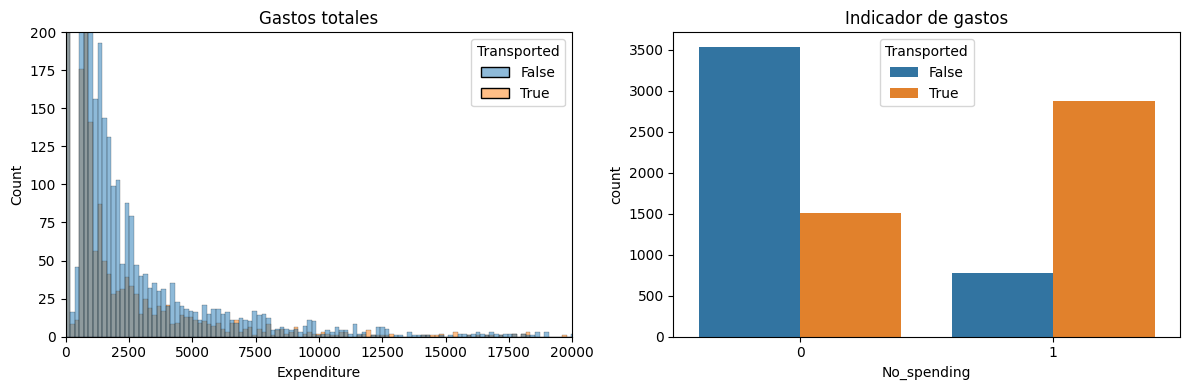

In [36]:
df['Expenditure']=df[exp_feats].sum(axis=1)
df['No_spending']=(df['Expenditure']==0).astype(int)

fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Expenditure', hue='Transported', bins=200)
plt.title('Gastos totales')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df, x='No_spending', hue='Transported')
plt.title('Indicador de gastos')
fig.tight_layout()

In [240]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth': 1, 'Mars': 2, 'Europa':3})
df['HomePlanet'].head(10)

0    3
1    1
2    3
3    3
4    1
5    1
6    1
7    1
8    1
9    3
Name: HomePlanet, dtype: int64

In [241]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e': 1, 'PSO J318.5-22':2})
df['Destination'].head(10)

0    0
1    0
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: Destination, dtype: int64

c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


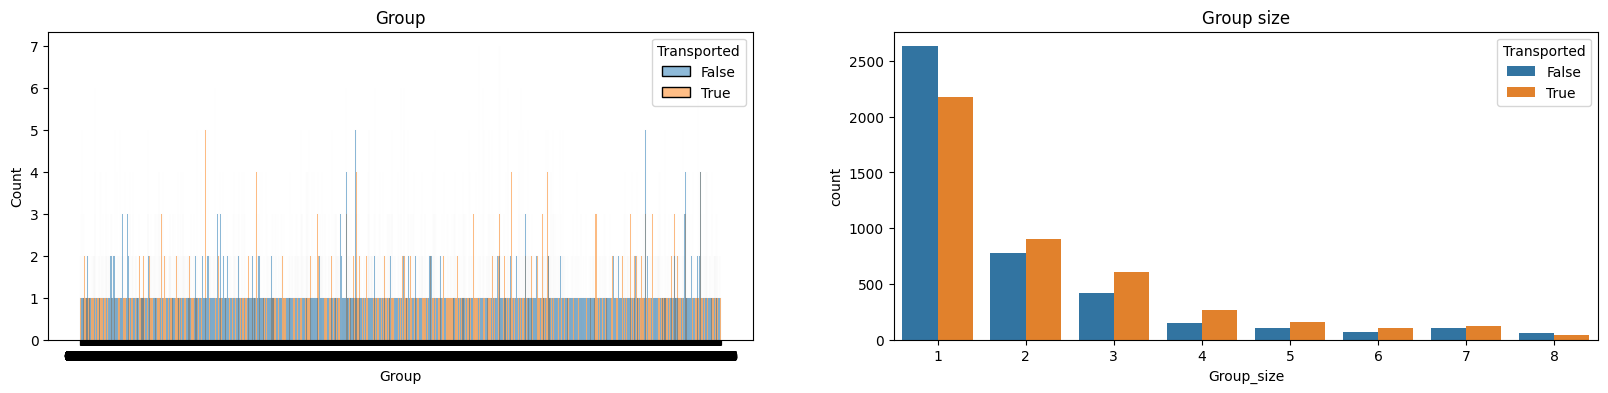

In [242]:
df['Group_size']=df['Group'].map(lambda x: df['Group'].value_counts()[x])

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

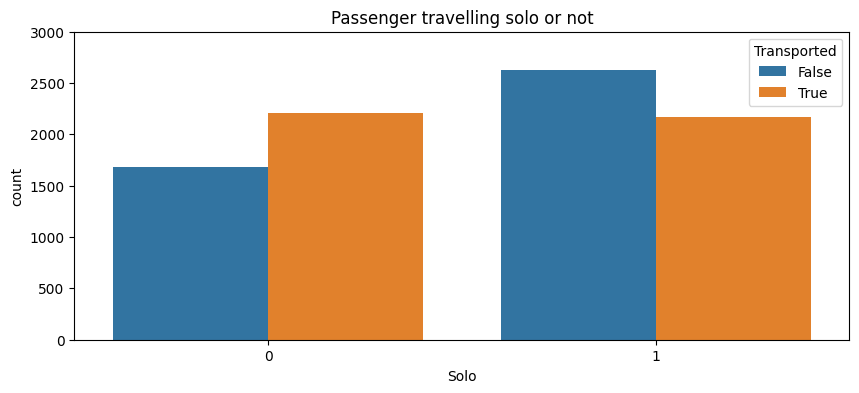

In [243]:
df['Solo']=(df['Group_size']==1).astype(int)

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Viajando solo')
plt.ylim([0,3000])

In [244]:
df.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Deck             0
Num              0
Side             0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Group            0
Idg              0
Expenditure      0
No_spending      0
Group_size       0
Solo             0
dtype: int64

In [245]:
df.drop(columns=['Group', 'Group_size', 'Num'], inplace=True)

In [246]:
df['Deck'] = df['Deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, })
df['Side'] = df['Side'].map({'S':0, 'P':1})
df.drop(columns=['Idg', 'VIP'], inplace=True)


In [247]:
df.head(10)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo
0,3,False,0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,True,False,False,False,False,False,False,0.0,1,1
1,1,False,0,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0,True,False,False,False,False,False,False,736.0,0,1
2,3,False,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,True,False,False,False,False,False,False,10383.0,0,0
3,3,False,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,True,False,False,False,False,False,False,5176.0,0,0
4,1,False,0,16.0,303.0,70.0,151.0,565.0,2.0,True,5,0,True,False,False,False,False,False,False,1091.0,0,1
5,1,False,2,44.0,0.0,483.0,0.0,291.0,0.0,True,5,1,True,False,False,False,False,False,False,774.0,0,1
6,1,False,0,26.0,42.0,1539.0,3.0,0.0,0.0,True,5,0,True,False,False,False,False,False,False,1584.0,0,0
7,1,True,0,28.0,0.0,0.0,0.0,0.0,0.0,True,6,0,True,False,False,False,False,False,False,0.0,1,0
8,1,False,0,35.0,0.0,785.0,17.0,216.0,0.0,True,5,0,True,False,False,False,False,False,False,1018.0,0,1
9,3,True,1,14.0,0.0,0.0,0.0,0.0,0.0,True,1,1,True,False,False,False,False,False,False,0.0,1,0


In [248]:
df['UnderAge'] = (df['Age'].astype(int) <= 18)
df.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo,UnderAge
0,3,False,0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,True,False,False,False,False,False,False,0.0,1,1,False
1,1,False,0,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0,True,False,False,False,False,False,False,736.0,0,1,False
2,3,False,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,True,False,False,False,False,False,False,10383.0,0,0,False
3,3,False,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,True,False,False,False,False,False,False,5176.0,0,0,False
4,1,False,0,16.0,303.0,70.0,151.0,565.0,2.0,True,5,0,True,False,False,False,False,False,False,1091.0,0,1,True


In [249]:
#df.drop(columns=['Age'], inplace=True)

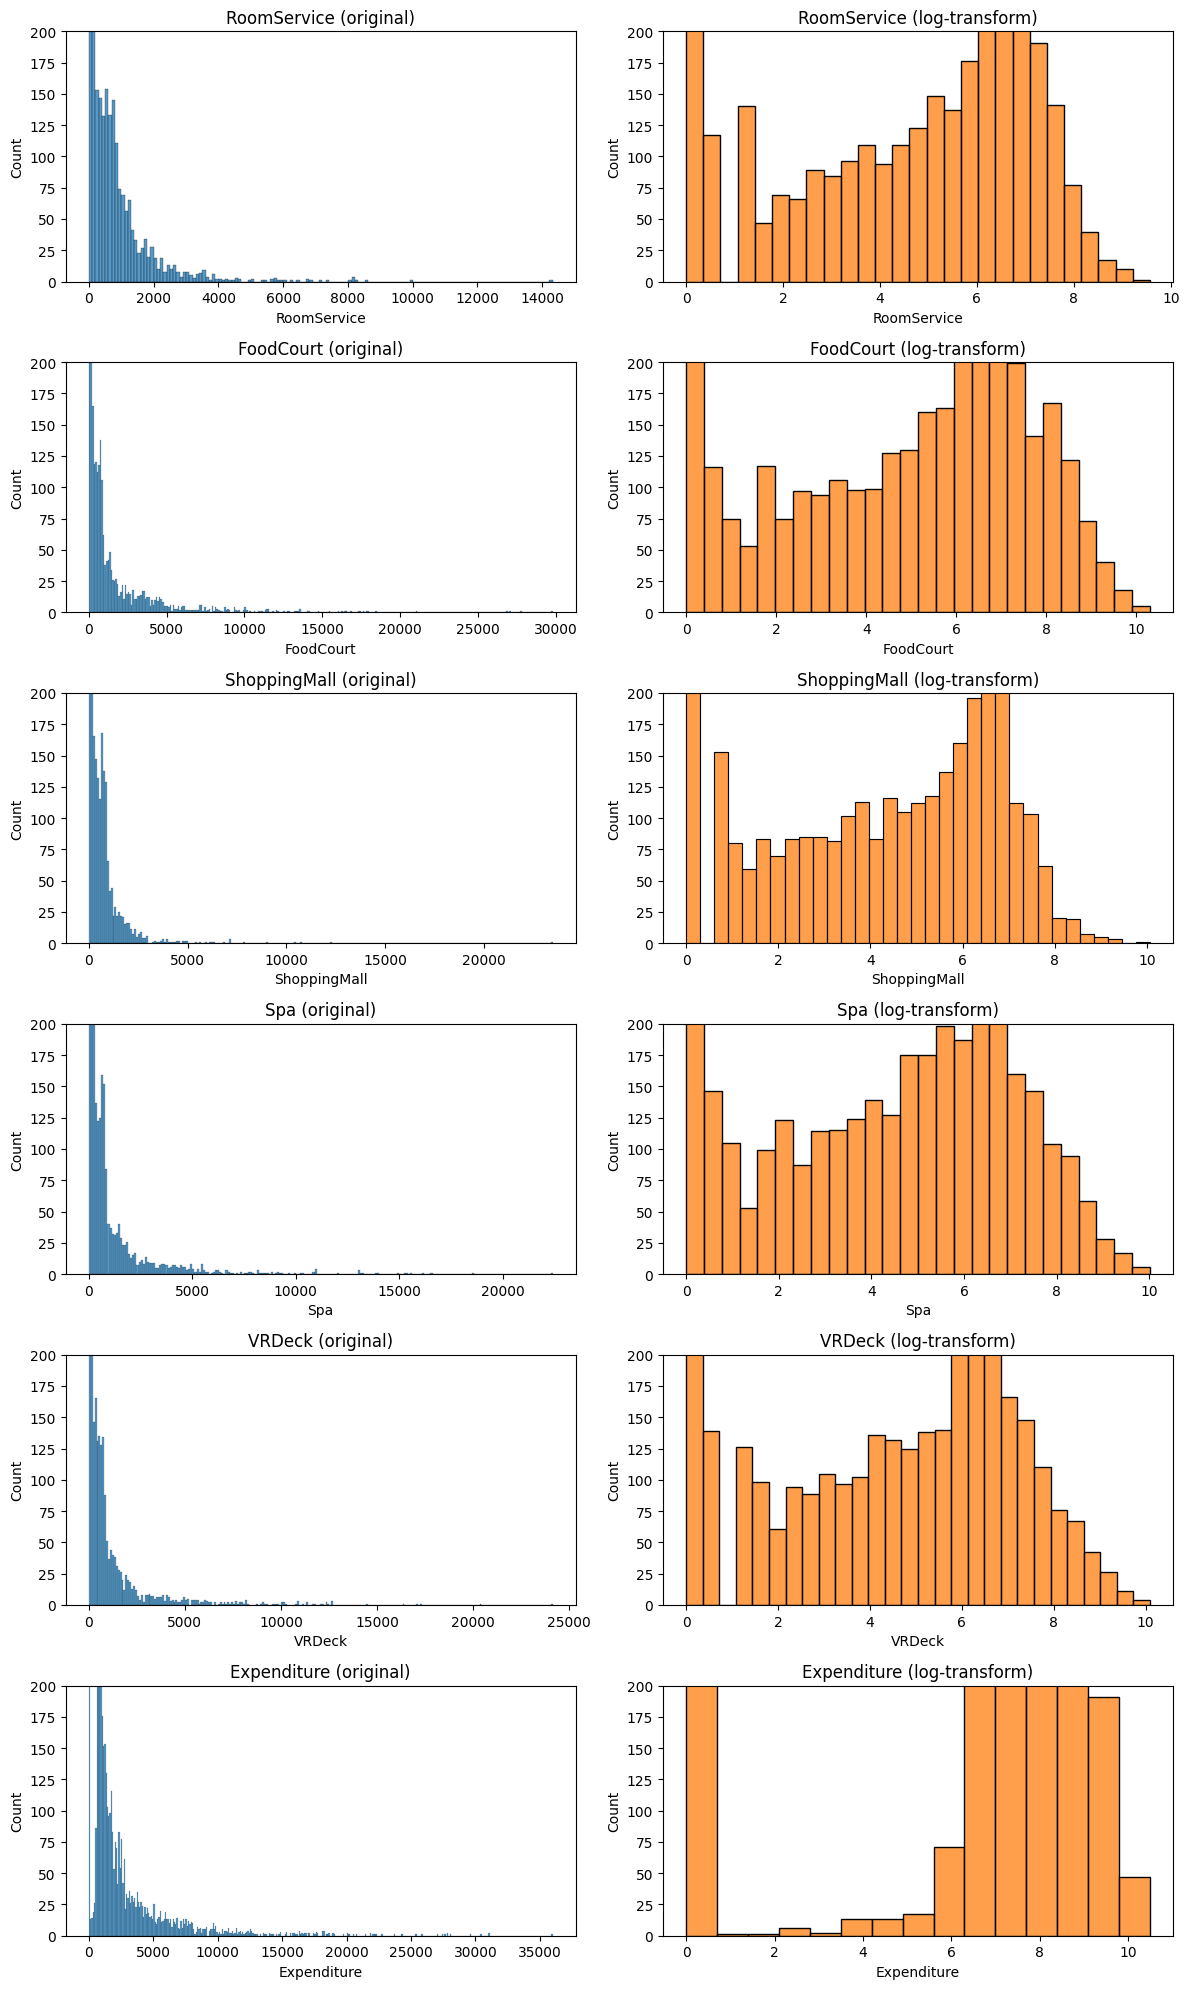

In [251]:
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(df[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+df[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [252]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    df[col]=np.log(1+df[col])
    df[col]=np.log(1+df[col])

In [256]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo,UnderAge
HomePlanet,1.000000,0.113284,-0.047797,0.235140,-0.090880,0.172344,-0.111020,0.122851,0.111551,0.194805,-0.871275,-0.048956,0.562606,-0.119786,-0.209670,-0.228206,-0.216018,-0.084817,-0.049945,-0.046026,0.089931,-0.270573,-0.186603
CryoSleep,0.113284,1.000000,0.118972,-0.071323,-0.499003,-0.512948,-0.491068,-0.527073,-0.506030,0.460132,0.014741,-0.021489,0.018100,-0.024246,0.035174,0.021212,0.001788,-0.067584,-0.035246,-0.857561,0.860713,-0.091562,0.114874
Destination,-0.047797,0.118972,1.000000,-0.014496,-0.089187,-0.016837,-0.075569,-0.049387,-0.018673,0.067972,0.011923,-0.004497,-0.014488,-0.000761,0.015254,-0.002934,0.038850,-0.035232,-0.005970,-0.087699,0.087490,0.031409,0.016963
Age,0.235140,-0.071323,-0.014496,1.000000,0.122794,0.192209,0.103880,0.185850,0.169119,-0.074233,-0.247307,-0.018069,0.142306,-0.002491,-0.062692,-0.075264,-0.066170,-0.008798,-0.021692,0.235983,-0.228089,0.133804,-0.648095
RoomService,-0.090880,-0.499003,-0.089187,0.122794,1.000000,0.162868,0.420343,0.222645,0.161861,-0.358293,0.058132,0.025946,-0.056911,0.031727,-0.004567,-0.012290,-0.006241,0.099131,0.014728,0.576374,-0.579755,0.116023,-0.161996
FoodCourt,0.172344,-0.512948,-0.016837,0.192209,0.162868,1.000000,0.166583,0.450590,0.481704,-0.181780,-0.261689,-0.015251,0.153755,-0.031924,-0.072278,-0.071482,-0.054897,-0.003038,0.003641,0.618055,-0.595957,0.039358,-0.203602
ShoppingMall,-0.111020,-0.491068,-0.075569,0.103880,0.420343,0.166583,1.000000,0.233301,0.167465,-0.220556,0.062769,0.019452,-0.059092,0.020801,0.002905,-0.009952,0.012961,0.076161,0.027745,0.564489,-0.570537,0.124617,-0.138228
Spa,0.122851,-0.527073,-0.049387,0.185850,0.222645,0.450590,0.233301,1.000000,0.418167,-0.361636,-0.194022,-0.006097,0.105417,-0.009459,-0.055585,-0.056257,-0.056478,0.014939,0.019879,0.629890,-0.612368,0.058503,-0.209292
VRDeck,0.111551,-0.506030,-0.018673,0.169119,0.161861,0.481704,0.167465,0.418167,1.000000,-0.341816,-0.205172,0.006657,0.118215,-0.023150,-0.062654,-0.058369,-0.043372,0.011728,0.003369,0.605916,-0.587919,0.050803,-0.196823
Transported,0.194805,0.460132,0.067972,-0.074233,-0.358293,-0.181780,-0.220556,-0.361636,-0.341816,1.000000,-0.119177,-0.106166,0.061398,-0.083313,0.028031,0.064217,-0.058138,-0.043850,-0.012746,-0.478212,0.481628,-0.113792,0.108587


<Axes: >

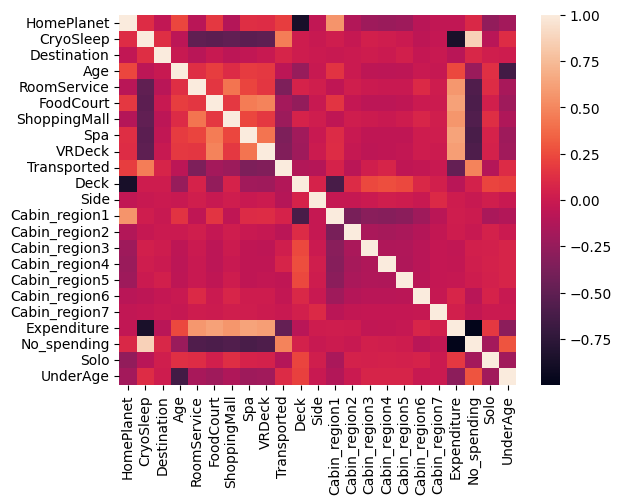

In [257]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Correlation Heatmap')

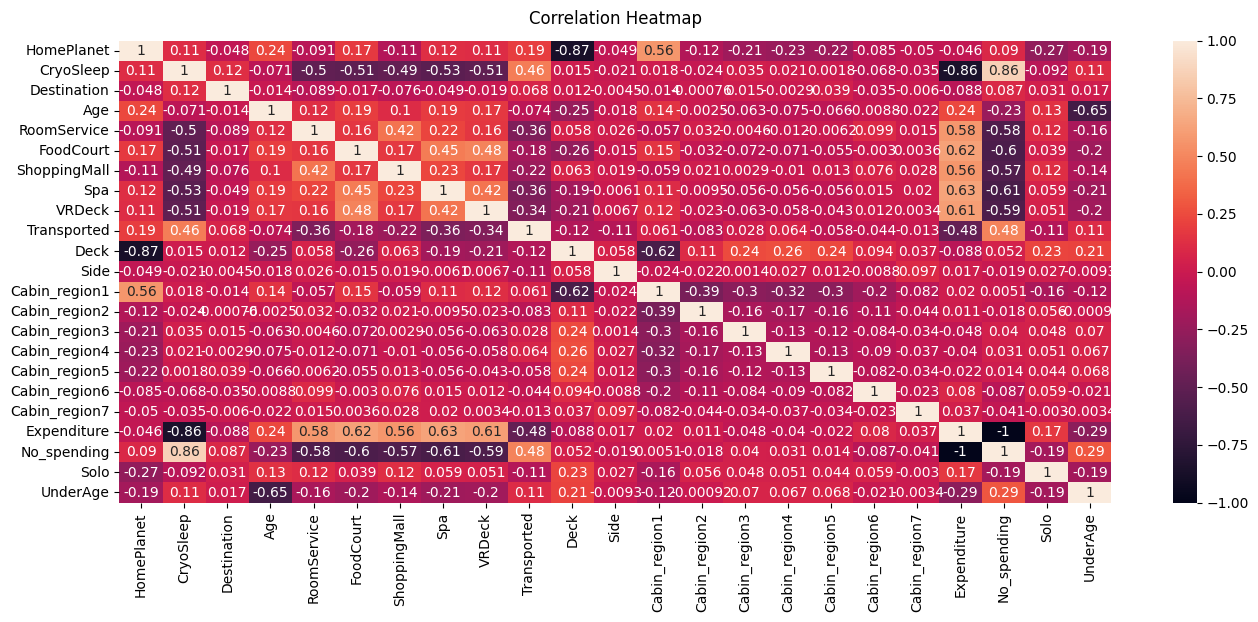

In [258]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [259]:
df.to_csv('cleandata.csv', sep=',', index=False, encoding='utf-8')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
data = pd.read_csv('./cleandata.csv')

X = data.drop(columns=['Transported'])
y = data['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred.astype(bool)))


              precision    recall  f1-score   support

       False       0.77      0.86      0.81      1284
        True       0.85      0.76      0.80      1324

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = pd.read_csv('./cleandata.csv')
X = data.drop(columns=['Transported'])
y = data['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.76      0.77      0.76      1299
        True       0.77      0.75      0.76      1309

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608



c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
